# Aula 01 - Parte 1
## Transformações Lineares

Nesta primeira parte da aula faremos uma breve revisão de transformações lineares. Vamos começar pensando em transformações em 2D.

### Rotação

Crie uma função que recebe um ângulo $\theta$ e devolve uma matriz de rotação representada por um *numpy.array*. Os pontos são representados em [coordenadas homogêneas](https://en.wikipedia.org/wiki/Homogeneous_coordinates).

In [4]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
# Funções úteis
def ponto(x, y):
    return np.array([x, y, 1]).reshape((3, 1))

def prettypt(pt):
    return tuple(pt.flatten())

def testar_funcao(funcao, entradas, parametros, saidas):
    EPSILON = 1e-1  # Sim, ele vai aceitar um erro grande...
    tudo_ok = True
    for entrada, parametro, saida_esperada in zip(entradas, parametros, saidas):
        if isinstance(parametro, tuple):
            mat = funcao(*parametro)
        else:
            mat = funcao(parametro)
        saida_obtida = mat.dot(entrada)
        if not np.allclose(saida_obtida, saida_esperada, atol=EPSILON):
            tudo_ok = False
            print('Erro para entrada {}. Esperado={}, Obtido={}'.format(prettypt(entrada), prettypt(saida_esperada), prettypt(saida_obtida)))
    if tudo_ok:
        print('Tudo OK :)')

In [6]:
def rotation_matrix(theta):
    matrix = np.array([[math.cos(theta), -math.sin(theta), 0], 
                      [math.sin(theta), math.cos(theta), 0], 
                      [0, 0, 1]])
    return matrix

Abra o arquivo *Rotacao.ggb* utilizando o software [Geogebra](https://www.geogebra.org/download). Gere mais 10 valores para testar a sua função movendo o ponto $p$ e alterando o valor de $\theta'$ no programa.

In [7]:
# Os pontos são representados por tuplas (x, y)
entradas = [
    ponto(4, 2),
    ponto(6, 2),
    ponto(0, 3),
    ponto(-2, 2.85)
    # ADICIONE OUTROS PONTOS DE ENTRADA AQUI...
]
angulos = [
    0.64,
    0.91,
    1.92,
    5.06
    
]
saidas = [
    ponto(2, 4),
    ponto(2.1, 5.97),
    ponto(-2.82,-1.02),
    ponto(2, 2.85)
    
    # ADICIONE OUTRAS SAÍDAS ESPERADAS AQUI...
]

In [8]:
# Testando a função...
testar_funcao(rotation_matrix, entradas, angulos, saidas)

Tudo OK :)


### Escala

Crie uma função que recebe um valor $s$ e devolve uma matriz de escala.

In [9]:
def scale_matrix(s):
    matrix = np.array([[s, 0, 0], [0,s,0], [0,0,1]])
    return matrix

In [10]:
# Gerando alguns valores para teste...
n = 10
entradas = [ponto(x, y) for x in range(n) for y in range(n)]
fatores = [i+2 for i in range(n*n)]  # Poderiam ser outros valores (o +2 é arbitrário)
saidas = [ponto(p[0,0]*s, p[1,0]*s) for p, s in zip(entradas, fatores)]

# Testando a função...
testar_funcao(scale_matrix, entradas, fatores, saidas)

Tudo OK :)


### Translação

Crie uma função que recebe dois valores $t_x$ e $t_y$ e devolve uma matriz de translação.

In [11]:
def translation_matrix(tx, ty):
    matrix = np.array([[1, 0, tx], [0,1,ty], [0,0,1]])
    return matrix

In [12]:
# Gerando alguns valores para teste...
n = 10
entradas = [ponto(x, y) for x in range(n) for y in range(n)]
translacoes = [(i+2, i+3) for i in range(n*n)]  # Poderiam ser outros valores (o +2 e +3 são arbitrários)
saidas = [ponto(p[0,0]+t[0], p[1,0]+t[1]) for p, t in zip(entradas, translacoes)]

# Testando a função...
testar_funcao(translation_matrix, entradas, translacoes, saidas)

Tudo OK :)


## Transformações em imagens

Crie duas funções que recebem uma imagem, um fator de escala $s$, um ângulo $\theta$ e uma translação $(t_x, t_y)$ e devolvem uma nova imagem aplicando a escala, rotação e translação, nesta ordem. As duas funções diferem na maneira de gerar a imagem final:

1) A primeira função deve percorrer cada pixel da imagem original e calcular onde ele deve aparecer na imagem final

2) A segunda função deve percorrer cada pixel da imagem final e calcular de onde ele veio na imagem original.

In [13]:
def aplica_transformacao_v1(img, s, theta, tx, ty):
    height, width, rgb = img.shape
    res = np.zeros_like(img)
    
    scaleArray = scale_matrix(s)
    rotationArray = rotation_matrix(theta)
    translationArray = translation_matrix(tx, ty)
    
    for i in range(0, height):
        for j in range(0, width):
            original = np.array([j, i, 1])
            escalada = np.dot(scaleArray, original)
            rotacionada = np.dot(rotationArray, escalada)
            final = np.dot(translationArray, rotacionada)
            x_final = int(final[0]/final[2])
            y_final = int(final[1]/final[2])

            if (x_final > 0 and x_final < width and y_final > 0 and y_final < height):
                res[y_final][x_final] = img[i][j]
            
    return res

def aplica_transformacao_v2(img, s, theta, tx, ty):
    res = np.zeros_like(img)
    height, width, rgb = img.shape
    
    scaleArray = scale_matrix(s)
    rotationArray = rotation_matrix(theta)
    translationArray = translation_matrix(tx, ty)
    M_final = np.dot(rotationArray, scaleArray)
    M_final = np.dot(translationArray, M_final)
    M_final = np.linalg.inv(M_final)
    
    for i in range(0, height):
        for j in range(0, width):
            original = np.array([j, i, 1])
            final = np.dot(M_final, original)
            x_final = int(final[0]/final[2])
            y_final = int(final[1]/final[2])

            if (x_final > 0 and x_final < width and y_final > 0 and y_final < height):
                res[i][j] = img[y_final][x_final]
                
    return res

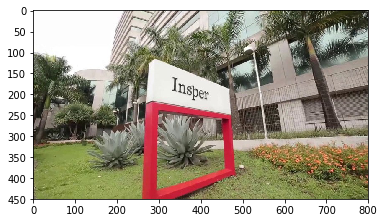

In [14]:
# Carregando a imagem de teste
img = plt.imread('insper-fachada.jpg')
plt.imshow(img)

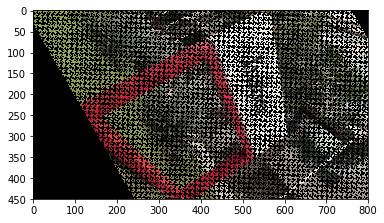

In [15]:
# Testando a primeira versão da função
plt.imshow(aplica_transformacao_v1(img, 1.5, math.pi/3, 500, -450))

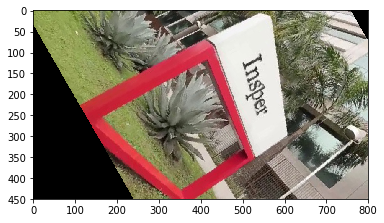

In [16]:
# Testando a segunda versão da função
plt.imshow(aplica_transformacao_v2(img, 1.5, math.pi/3, 500, -450))

# Para pensar

1. Qual a diferença entre as imagens geradas? Por que essa diferença existe?
2. A ordem das transformações faz diferença? Faça um teste:
    1. Crie uma lista com 4 pontos nos cantos de um quadrado
    2. Gere uma imagem em branco e desenhe os 4 pontos
    3. Gere uma matriz de translação, uma de rotação e outra de escala
    4. Aplica as 3 transformações sobre os 4 pontos em todas as ordens possíveis (6 no total)
    5. Para cada combinação desenhe os 4 pontos transformados com outra cor